Visualize a Pyloric solution slice colored by the amount of change in each bias value that would be incurred over a set period of time at that point. Similar to the maxmin detected slices, but potentially a step more informative because it takes into account how long it stays that way. The idea is that either i) the smallest values will correspond to the final resting places of solutions, or at least ii) some conception of a vector field can explain the domains of obvious movement and limit cycle-like objects may potentially emerge from them to explain long-term solutions

In [18]:
import numpy as np
import matplotlib.pyplot as plt

First, the version where all solutions are evaluated for the same amount of time, regardless of oscillation (probably would start to even out if time increased)

wait no it wouldn't...the important thing here is that magnitudes are *relative* to other points

In [19]:
#slice sampling params

par1min = -16.0
par1max = 16.0
par1step = .1
par2min = -16.0
par2max = 16.0
par2step = .1

par1_res = np.arange(par1min,par1max+par1step,par1step)
par2_res = np.arange(par2min,par2max+par2step,par2step)

print(len(par1_res),len(par2_res),len(par1_res)*len(par2_res))

321 321 103041


In [23]:
change = np.loadtxt('../Cpp/Petenetchangelong.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

biastrack = np.loadtxt('../Cpp/PeteBiasTrack33.dat')
dt = .01
runduration = 10000
runsteps = int(runduration/dt)
repeats = int(1000/20)
biastrack = biastrack.reshape(repeats, runsteps, 2)

In [30]:
#define zoom parameters
zoomx_min = -16
zoomx_max = 15.9
zoomy_min = -16
zoomy_max = -15.9
zoomx_min_idx = np.where(par1_res.round(2)==zoomx_min)[0][0]
zoomx_max_idx = np.where(par1_res.round(2)==zoomx_max)[0][0]
zoomy_min_idx = np.where(par2_res.round(2)==zoomy_min)[0][0]
zoomy_max_idx = np.where(par2_res.round(2)==zoomy_max)[0][0]

biastrackindices = range(2)
biastrack_mintime = 0#len(biastrack[0])-int(500/dt)
biastrack_maxtime = len(biastrack[0])

# print(zoomx_min_idx,zoomx_max_idx,zoomy_min_idx,zoomy_max_idx)
PeteB1 = 2.68606
PeteB3 = -8.09309

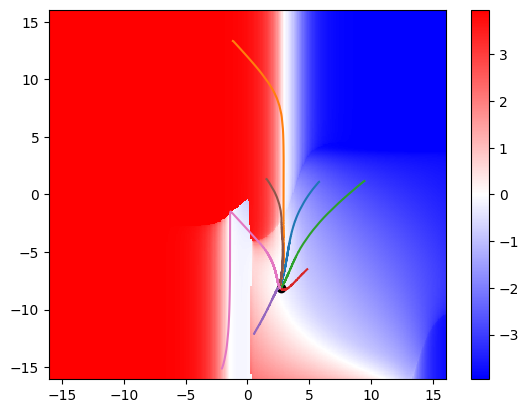

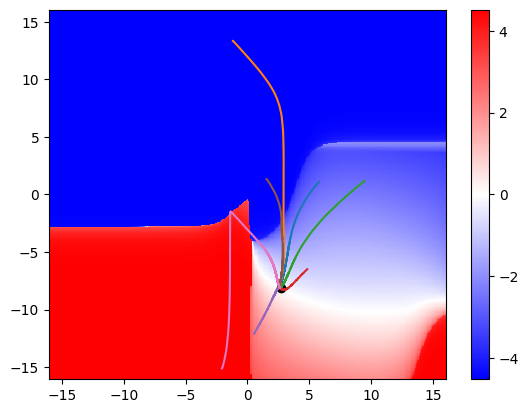

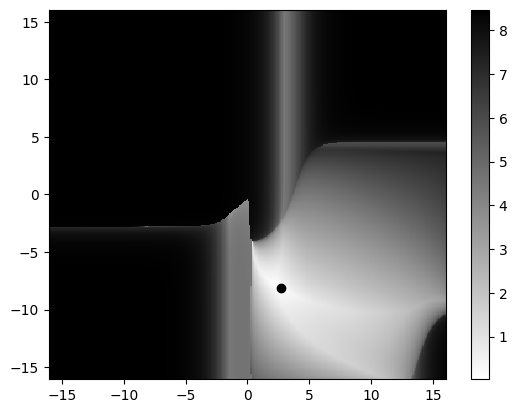

In [39]:
# plt.pcolormesh(par1_res[zoomx_min_idx:zoomx_max_idx],par2_res[zoomy_min_idx:zoomy_max_idx],change[zoomy_min_idx:zoomy_max_idx,zoomx_min_idx:zoomx_max_idx,0],cmap='bwr')
# plt.colorbar()
# if((PeteB1>zoomx_min)&(PeteB1<zoomx_max)&(PeteB3>zoomy_min)&(PeteB3<zoomy_max)):
#     plt.scatter(PeteB1,PeteB3,color='k')
# for i in biastrackindices:
#     plt.plot(biastrack[i,biastrack_mintime:biastrack_maxtime,0],biastrack[i,biastrack_mintime:biastrack_maxtime,1])
# plt.show()
# plt.pcolormesh(par1_res[zoomx_min_idx:zoomx_max_idx],par2_res[zoomy_min_idx:zoomy_max_idx],change[zoomy_min_idx:zoomy_max_idx,zoomx_min_idx:zoomx_max_idx,1],cmap='bwr')
# plt.colorbar()
# if((PeteB1>zoomx_min)&(PeteB1<zoomx_max)&(PeteB3>zoomy_min)&(PeteB3<zoomy_max)):
#     plt.scatter(PeteB1,PeteB3,color='k')
# for i in biastrackindices:
#     plt.plot(biastrack[i,biastrack_mintime:biastrack_maxtime,0],biastrack[i,biastrack_mintime:biastrack_maxtime,1])
# plt.show()
biastrackindices = [0,1,5,7,8,15,18]
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(PeteB1,PeteB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(PeteB1,PeteB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(PeteB1,PeteB3,color='k')
plt.show()

Repeat the analysis in another slice (another Pyloric solution)

In [41]:
QuinnB1 = 1.77864
QuinnB3 = -8.61896
change = np.loadtxt('../Cpp/Quinnnetchangelong.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

biastrack = np.loadtxt('../Cpp/QuinnBiasTrack33.dat')
dt = .01
runduration = 10000
runsteps = int(runduration/dt)
repeats = int(1000/20)
biastrack = biastrack.reshape(repeats, runsteps, 2)

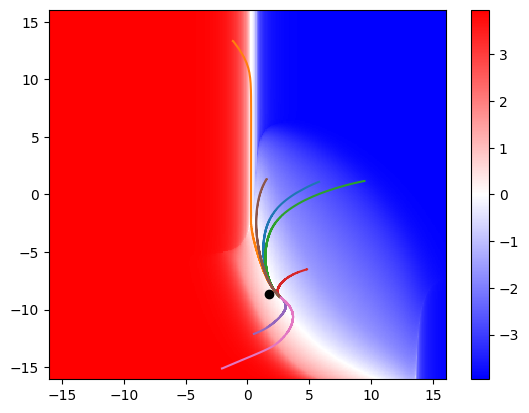

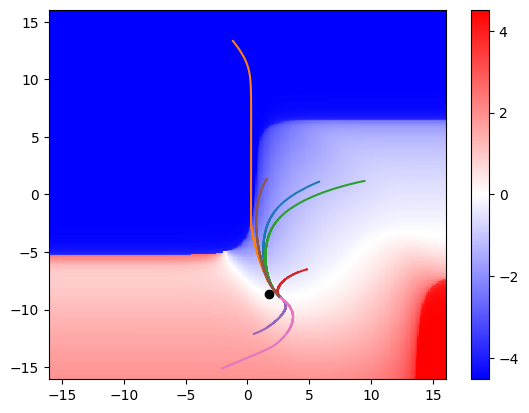

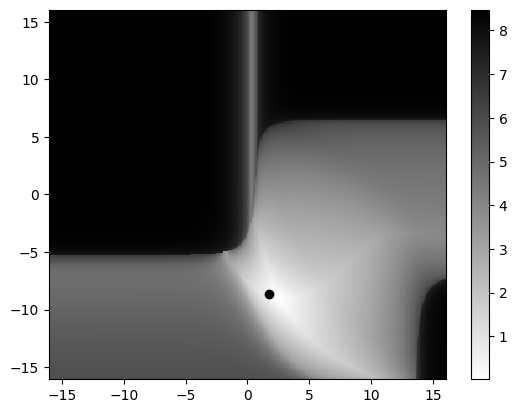

In [42]:
biastrackindices = [0,1,5,7,8,15,18]
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(QuinnB1,QuinnB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(QuinnB1,QuinnB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(QuinnB1,QuinnB3,color='k')
plt.show()

And another...

In [44]:
RonnB1 = 1.24027
RonnB3 =-12.2675
change = np.loadtxt('../Cpp/Ronnnetchangelong.dat')
change = change.reshape((len(par1_res),len(par2_res),2))
change = np.swapaxes(change,1,0)

biastrack = np.loadtxt('../Cpp/RonnBiasTrack33.dat')
dt = .01
runduration = 10000
runsteps = int(runduration/dt)
repeats = int(1000/20)
biastrack = biastrack.reshape(repeats, runsteps, 2)

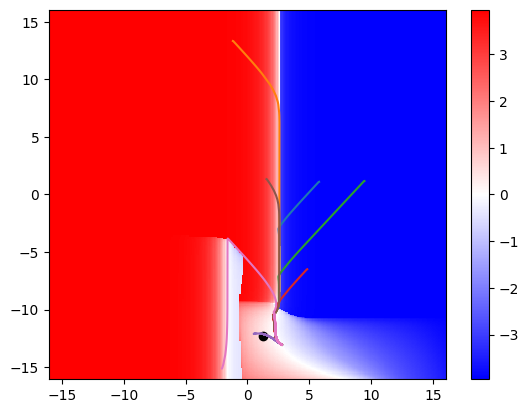

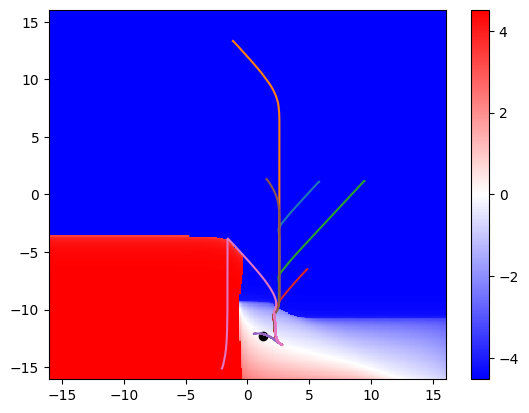

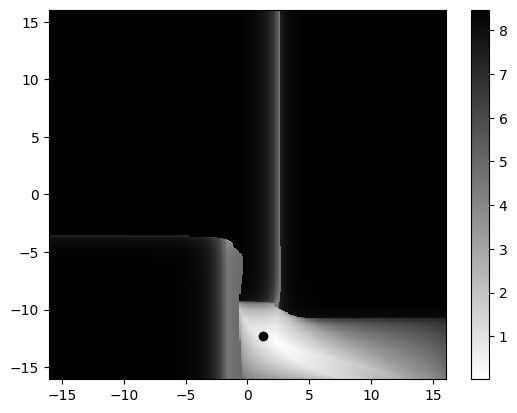

In [45]:
biastrackindices = [0,1,5,7,8,15,18]
plt.pcolormesh(par1_res,par2_res,change[:,:,0],cmap='bwr')
plt.colorbar()
plt.scatter(RonnB1,RonnB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.pcolormesh(par1_res,par2_res,change[:,:,1],cmap='bwr')
plt.colorbar()
plt.scatter(RonnB1,RonnB3,color='k')
for i in biastrackindices:
    plt.plot(biastrack[i,:,0],biastrack[i,:,1])
plt.show()
plt.show()
plt.pcolormesh(par1_res,par2_res,np.abs(change[:,:,0])+np.abs(change[:,:,1]),cmap='binary')
plt.colorbar()
plt.scatter(RonnB1,RonnB3,color='k')
plt.show()